<img align="left" src = https://project.lsst.org/sites/default/files/Rubin-O-Logo_0.png width=250 style="padding: 10px"> 
<br>
<b>DECam HiTS Analysis Notebook</b> <br>
Contact author: Ian Sullivan<br>
Last verified to run: March 1, 2023<br>
LSST Science Piplines version: d_2023_05_17<br>
Container Size: Medium <br>

# DM-38741: Investigate best setting of maxFootprintArea in DipoleFitTask

DECam HiTS, convolve Template.

* Uses `decam_rings_v1` skymap
* Templates from HiTS 2014 are in `/sdf/group/rubin/repo/main/u/elhoward/DM-36024/templates`
* Final processing of HiTS 2015 is in `u/elhoward/DM-37694/hits2015`
* Postgres schema is `elhoward_dm37694_hits_appipe`
* Working directory on USDF with bps logs, pipelines, etc. is `/sdf/group/rubin/u/elhoward/repo-main-logs/DM-37694`

For ApPipe.yaml:
```
inCollection: DECam/defaults/hits2015,u/mrawls/DM-34710-hits-crosstalk-sources,u/mrawls/DM-34710/templates
dataQuery: "instrument='DECam' AND skymap='decam_rings_v1' AND detector NOT IN (2, 61) AND exposure>400000"
```

Notes: The exposure cuts are necessary to force each pipeline to use only the 2014 images (numbered in the 200000s) for template building, and to use only the 2015 images (numbered in the 400000s) as science images.

## Previous Runs 

## Table of Contents

1. [Loading DiaObjects and DiaSources](#section_1)
2. [DiaObject and DiaSources analysis](#section_2)

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import importlib
import pandas as pd
import astropy.units as u
import lsst.afw.display as afwDisplay

import lsst.daf.butler as dafButler
from lsst.analysis.ap import legacyApdbUtils as utils
from lsst.analysis.ap import legacyPlotUtils as plac

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

importlib.reload(utils)

<module 'lsst.analysis.ap.legacyApdbUtils' from '/home/s/sullii/project/build/analysis_ap/python/lsst/analysis/ap/legacyApdbUtils.py'>

## 1. <a id="section_1">Loading DiaObjects and DiaSources</a>

In [30]:
repo = '/repo/main'
butler = dafButler.Butler(repo)
instrument = 'DECam'
skymap = 'decam_rings_v1'

dbType='postgres'
dbName='lsst-devl'

fakeStatus = 'no fakes'

dmnum = '37694'
collections = f'u/elhoward/DM-{dmnum}/hits2015'
schema = f'elhoward_dm{dmnum}_hits_appipe'
month = 'February (Base)'
year = '2023'

collectionsList = collections

In [3]:
objTable, srcTable, goodObj, goodSrc = utils.loadTables(repo,
                                                      dbName=dbName,
                                                      dbType=dbType,
                                                      instrument=instrument,
                                                      schema=schema)

In [4]:
flagTable, srcTableFlags, flagFilter, goodSrc, goodObj = utils.makeSrcTableFlags(srcTable, objTable,
                                                                               instrument=instrument,
                                                                               repo=repo)

## 2. <a id="section_2">DIA object and source visual analysis</a>

In [5]:
bandList = ['g']
colorList = ['C2']
collection = collections

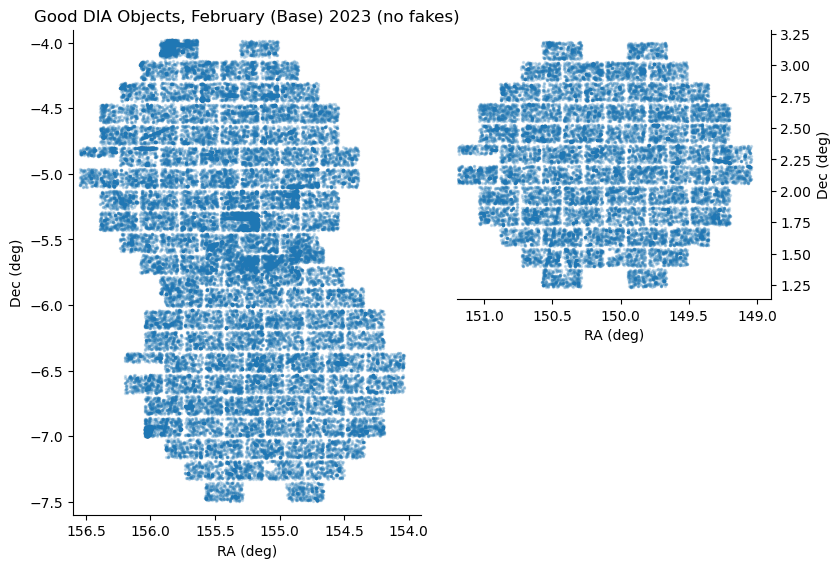

In [6]:
hitsPlot = plac.plotHitsSourcesOnSky(goodObj, title=f'Good DIA Objects, {month} {year} ({fakeStatus})')

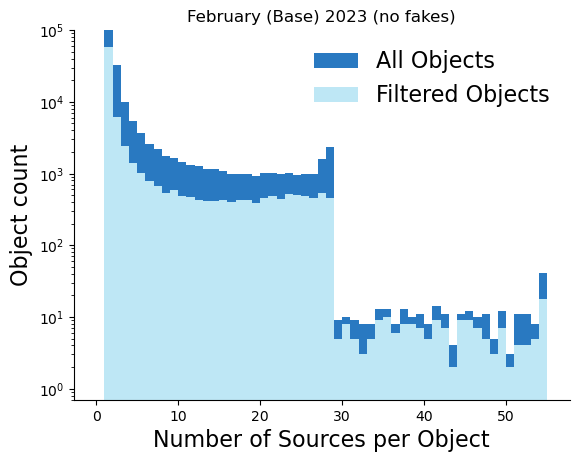

In [7]:
hist = plac.plotDiaObjectHistogram(objTable, goodObj, title=f'{month} {year} ({fakeStatus})')

# Investigate the dipole measurements

In [8]:
srcTable.columns

Index(['diaSourceId', 'diaObjectId', 'ra', 'decl', 'ccdVisitId', 'midPointTai',
       'apFlux', 'psFlux', 'apFluxErr', 'psFluxErr', 'totFlux', 'totFluxErr',
       'snr', 'x', 'y', 'ixxPSF', 'iyyPSF', 'ixyPSF', 'flags', 'filterName',
       'visit', 'detector', 'instrument'],
      dtype='object')

In [11]:
srcTable


,diaSourceId,diaObjectId,ra,decl,ccdVisitId,midPointTai,apFlux,psFlux,apFluxErr,psFluxErr,...,x,y,ixxPSF,iyyPSF,ixyPSF,flags,filterName,visit,detector,instrument
0,88424380815638702,88424380815638702,150.280546,2.822236,41175811,57072.204571,NaN,-3004.710280,NaN,311.389670,...,553.018616,5.775093,0.215334,-0.009471,-0.009471,31164876,g,411758,11,DECam
1,88424380815638703,88424380815638703,150.280545,2.771425,41175811,57072.204571,NaN,-13487.549975,NaN,313.227691,...,1248.987061,5.980573,0.215500,-0.009479,-0.009479,31164876,g,411758,11,DECam
2,88424380815638704,88424380815638704,150.280609,2.746591,41175811,57072.204571,NaN,-1876.183589,NaN,309.950800,...,1589.018921,6.954192,0.215516,-0.009479,-0.009479,31164876,g,411758,11,DECam
3,88424380815638705,88424380815638705,150.282726,2.772019,41175811,57072.204571,-2898.916523,-2285.824215,523.096129,166.819859,...,1240.800049,35.757565,0.215499,-0.009479,-0.009479,25168000,g,411758,11,DECam
4,88424380815638706,88424380815638706,150.282853,2.846098,41175811,57072.204571,1724.802254,1325.609780,536.409892,176.929423,...,226.002197,37.101116,0.215273,-0.009469,-0.009469,2188,g,411758,11,DECam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911046,88266089795945548,88266089795945548,149.948687,3.185490,41102101,57070.296110,-1241.213679,-962.492553,524.149301,184.543167,...,70.358536,3942.457031,0.309298,0.058699,0.058699,25166156,g,411021,1,DECam
911047,88266089795945550,88266089795945550,149.950113,3.044275,41102101,57070.296110,-1422.955179,-1033.598483,516.992871,179.674234,...,2009.786743,3963.705322,0.310272,0.058884,0.058884,25166284,g,411021,1,DECam
911048,88266089795945551,88266089795945551,149.951046,3.185441,41102101,57070.296110,-2121.988506,-980.935806,518.178317,182.590768,...,71.003601,3974.685059,0.309278,0.058695,0.058695,25166156,g,411021,1,DECam
911049,88266089795945553,88266089795945553,149.951643,3.183332,41102101,57070.296110,1491.866960,973.399410,520.064704,193.070081,...,100.055908,3982.896240,0.309341,0.058707,0.058707,159383884,g,411021,1,DECam


In [12]:
srcTableFlags

,diaSourceId,diaObjectId,ra,decl,ccdVisitId,midPointTai,apFlux,psFlux,apFluxErr,psFluxErr,...,slot_PsfFlux_flag,slot_PsfFlux_flag_noGoodPixels,slot_PsfFlux_flag_edge,ip_diffim_forced_PsfFlux_flag,ip_diffim_forced_PsfFlux_flag_noGoodPixels,ip_diffim_forced_PsfFlux_flag_edge,slot_Shape_flag,slot_Shape_flag_no_pixels,slot_Shape_flag_not_contained,slot_Shape_flag_parent_source
0,88424380815638702,88424380815638702,150.280546,2.822236,41175811,57072.204571,NaN,-3004.710280,NaN,311.389670,...,True,False,True,True,False,True,True,True,False,False
1,88424380815638703,88424380815638703,150.280545,2.771425,41175811,57072.204571,NaN,-13487.549975,NaN,313.227691,...,True,False,True,True,False,True,True,True,False,False
2,88424380815638704,88424380815638704,150.280609,2.746591,41175811,57072.204571,NaN,-1876.183589,NaN,309.950800,...,True,False,True,True,False,True,True,True,False,False
3,88424380815638705,88424380815638705,150.282726,2.772019,41175811,57072.204571,-2898.916523,-2285.824215,523.096129,166.819859,...,False,False,False,False,False,False,True,True,False,False
4,88424380815638706,88424380815638706,150.282853,2.846098,41175811,57072.204571,1724.802254,1325.609780,536.409892,176.929423,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911046,88266089795945548,88266089795945548,149.948687,3.185490,41102101,57070.296110,-1241.213679,-962.492553,524.149301,184.543167,...,False,False,False,False,False,False,True,True,False,False
911047,88266089795945550,88266089795945550,149.950113,3.044275,41102101,57070.296110,-1422.955179,-1033.598483,516.992871,179.674234,...,False,False,False,False,False,False,True,True,False,False
911048,88266089795945551,88266089795945551,149.951046,3.185441,41102101,57070.296110,-2121.988506,-980.935806,518.178317,182.590768,...,False,False,False,False,False,False,True,True,False,False
911049,88266089795945553,88266089795945553,149.951643,3.183332,41102101,57070.296110,1491.866960,973.399410,520.064704,193.070081,...,False,False,False,False,False,False,True,True,False,False


In [18]:
ccdVisits = np.unique(np.sort(srcTable["ccdVisitId"]))

In [24]:
visits = np.unique([cv//100 for cv in ccdVisits])

In [25]:
visits

array([410915, 410929, 410931, 410971, 410985, 410987, 411021, 411035,
       411037, 411055, 411069, 411071, 411255, 411269, 411271, 411305,
       411319, 411321, 411355, 411369, 411371, 411406, 411420, 411422,
       411456, 411470, 411472, 411657, 411671, 411673, 411707, 411721,
       411724, 411758, 411772, 411774, 411808, 411822, 411824, 411858,
       411872, 411874, 412060, 412074, 412076, 412250, 412264, 412266,
       412307, 412321, 412324, 412504, 412518, 412520, 412554, 412568,
       412570, 412604, 412618, 412620, 412654, 412668, 412670, 412704,
       412718, 412720, 413635, 413649, 413651, 413680, 413694, 413696,
       415314, 415328, 415330, 415364, 415378, 415380, 419791, 419802,
       419804, 421590, 421604, 421606])

In [26]:
ccds = np.unique(np.sort([cv % 100 for cv in ccdVisits]))

In [27]:
ccds

array([ 1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 62])

In [31]:
diaSrcCat = butler.get("goodSeeingDiff_diaSrc", collections=collections, visit=visits[0], detector=ccds[0], skymap=skymap, instrument=instrument)

In [102]:
badFlagList = ["base_PixelFlags_flag", "base_PixelFlags_flag_edge", "base_PixelFlags_flag_interpolated",
               "base_PixelFlags_flag_saturated", "base_PixelFlags_flag_saturatedCenter", "slot_PsfFlux_flag_edge",
               "ip_diffim_ClassificationDipole_flag", "ip_diffim_DipoleFit_flag", "sky_source"]

In [101]:
diaSrcCat.asAstropy()

id,coord_ra,coord_dec,parent,flags_negative,base_NaiveCentroid_x,base_NaiveCentroid_y,base_NaiveCentroid_flag,base_NaiveCentroid_flag_noCounts,base_NaiveCentroid_flag_edge,base_NaiveCentroid_flag_resetToPeak,base_PeakCentroid_x,base_PeakCentroid_y,base_PeakCentroid_flag,base_SdssCentroid_x,base_SdssCentroid_y,base_SdssCentroid_xErr,base_SdssCentroid_yErr,base_SdssCentroid_flag,base_SdssCentroid_flag_edge,base_SdssCentroid_flag_noSecondDerivative,base_SdssCentroid_flag_almostNoSecondDerivative,base_SdssCentroid_flag_notAtMaximum,base_SdssCentroid_flag_near_edge,base_SdssCentroid_flag_resetToPeak,base_SdssCentroid_flag_badError,ip_diffim_NaiveDipoleCentroid_flag,base_CircularApertureFlux_flag_badCentroid,base_GaussianFlux_flag_badCentroid,base_NaiveCentroid_flag_badInitialCentroid,base_PeakLikelihoodFlux_flag_badCentroid,base_PsfFlux_flag_badCentroid,base_SdssCentroid_flag_badInitialCentroid,base_SdssShape_flag_badCentroid,ext_trailedSources_Naive_flag_badCentroid,slot_Centroid_flag,ip_diffim_NaiveDipoleCentroid_pos_flag,slot_Centroid_pos_flag,ip_diffim_NaiveDipoleCentroid_neg_flag,slot_Centroid_neg_flag,ip_diffim_NaiveDipoleCentroid_x,slot_Centroid_x,ip_diffim_NaiveDipoleCentroid_y,slot_Centroid_y,ip_diffim_NaiveDipoleCentroid_xErr,slot_Centroid_xErr,ip_diffim_NaiveDipoleCentroid_yErr,slot_Centroid_yErr,ip_diffim_NaiveDipoleCentroid_pos_x,slot_Centroid_pos_x,ip_diffim_NaiveDipoleCentroid_pos_y,slot_Centroid_pos_y,ip_diffim_NaiveDipoleCentroid_pos_xErr,slot_Centroid_pos_xErr,ip_diffim_NaiveDipoleCentroid_pos_yErr,slot_Centroid_pos_yErr,ip_diffim_NaiveDipoleCentroid_neg_x,slot_Centroid_neg_x,ip_diffim_NaiveDipoleCentroid_neg_y,slot_Centroid_neg_y,ip_diffim_NaiveDipoleCentroid_neg_xErr,slot_Centroid_neg_xErr,ip_diffim_NaiveDipoleCentroid_neg_yErr,slot_Centroid_neg_yErr,base_SdssShape_xx,slot_Shape_xx,base_SdssShape_yy,slot_Shape_yy,base_SdssShape_xy,slot_Shape_xy,base_SdssShape_xxErr,slot_Shape_xxErr,base_SdssShape_yyErr,slot_Shape_yyErr,base_SdssShape_xyErr,slot_Shape_xyErr,base_SdssShape_x,slot_Shape_x,base_SdssShape_y,slot_Shape_y,base_SdssShape_instFlux,slot_Shape_instFlux,base_SdssShape_instFluxErr,slot_Shape_instFluxErr,base_SdssShape_psf_xx,slot_PsfShape_xx,slot_Shape_psf_xx,base_SdssShape_psf_yy,slot_PsfShape_yy,slot_Shape_psf_yy,base_SdssShape_psf_xy,slot_PsfShape_xy,slot_Shape_psf_xy,base_SdssShape_instFlux_xx_Cov,slot_Shape_instFlux_xx_Cov,base_SdssShape_instFlux_yy_Cov,slot_Shape_instFlux_yy_Cov,base_SdssShape_instFlux_xy_Cov,slot_Shape_instFlux_xy_Cov,base_SdssShape_flag,base_GaussianFlux_flag_badShape,slot_Shape_flag,base_SdssShape_flag_unweightedBad,base_GaussianFlux_flag_badShape_unweightedBad,slot_Shape_flag_unweightedBad,base_SdssShape_flag_unweighted,base_GaussianFlux_flag_badShape_unweighted,slot_Shape_flag_unweighted,base_SdssShape_flag_shift,base_GaussianFlux_flag_badShape_shift,slot_Shape_flag_shift,base_SdssShape_flag_maxIter,base_GaussianFlux_flag_badShape_maxIter,slot_Shape_flag_maxIter,base_SdssShape_flag_psf,base_GaussianFlux_flag_badShape_psf,slot_Shape_flag_psf,base_CircularApertureFlux_3_0_instFlux,base_CircularApertureFlux_3_0_instFluxErr,base_CircularApertureFlux_3_0_flag,base_CircularApertureFlux_3_0_flag_apertureTruncated,base_CircularApertureFlux_3_0_flag_sincCoeffsTruncated,base_CircularApertureFlux_4_5_instFlux,base_CircularApertureFlux_4_5_instFluxErr,base_CircularApertureFlux_4_5_flag,base_CircularApertureFlux_4_5_flag_apertureTruncated,base_CircularApertureFlux_4_5_flag_sincCoeffsTruncated,base_CircularApertureFlux_6_0_instFlux,base_CircularApertureFlux_6_0_instFluxErr,base_CircularApertureFlux_6_0_flag,base_CircularApertureFlux_6_0_flag_apertureTruncated,base_CircularApertureFlux_6_0_flag_sincCoeffsTruncated,base_CircularApertureFlux_9_0_instFlux,base_CircularApertureFlux_9_0_instFluxErr,base_CircularApertureFlux_9_0_flag,base_CircularApertureFlux_9_0_flag_apertureTruncated,base_CircularApertureFlux_9_0_flag_sincCoeffsTruncated,base_CircularApertureFlux_12_0_instFlux,slot_ApFlux_instFlux,b

In [114]:
schema = diaSrcCat.schema

In [120]:
schema.getNames()

{'base_CircularApertureFlux_12_0_flag',
 'base_CircularApertureFlux_12_0_flag_apertureTruncated',
 'base_CircularApertureFlux_12_0_instFlux',
 'base_CircularApertureFlux_12_0_instFluxErr',
 'base_CircularApertureFlux_17_0_flag',
 'base_CircularApertureFlux_17_0_flag_apertureTruncated',
 'base_CircularApertureFlux_17_0_instFlux',
 'base_CircularApertureFlux_17_0_instFluxErr',
 'base_CircularApertureFlux_25_0_flag',
 'base_CircularApertureFlux_25_0_flag_apertureTruncated',
 'base_CircularApertureFlux_25_0_instFlux',
 'base_CircularApertureFlux_25_0_instFluxErr',
 'base_CircularApertureFlux_35_0_flag',
 'base_CircularApertureFlux_35_0_flag_apertureTruncated',
 'base_CircularApertureFlux_35_0_instFlux',
 'base_CircularApertureFlux_35_0_instFluxErr',
 'base_CircularApertureFlux_3_0_flag',
 'base_CircularApertureFlux_3_0_flag_apertureTruncated',
 'base_CircularApertureFlux_3_0_flag_sincCoeffsTruncated',
 'base_CircularApertureFlux_3_0_instFlux',
 'base_CircularApertureFlux_3_0_instFluxErr',


In [49]:
diaSrcCat["ip_diffim_NaiveDipoleFlux_npos"][diaSrcCat["ip_diffim_ClassificationDipole_value"] > 0]+\
diaSrcCat["ip_diffim_NaiveDipoleFlux_nneg"][diaSrcCat["ip_diffim_ClassificationDipole_value"] > 0]

array([ 500,  396,  682,  287,  417,  705,  413,  658, 1122, 1117,  383,
       1030, 1149,  543,  365,  341,  448,  284,  744,  428,  860,  303,
       1063,  996,  573,  373,  564,  406,  895,  233,  650,  264,  390,
        989,  513,  283,  674,  221,  768,  453,  474,  362], dtype=int32)

In [103]:
def collect_dipole_pixels_good(visit, ccd):
    diaSrcCat = butler.get("goodSeeingDiff_diaSrc", collections=collections, visit=visit,
                           detector=ccd, skymap=skymap, instrument=instrument)
    dipoleFlag = diaSrcCat["ip_diffim_ClassificationDipole_value"] > 0
    for flag in badFlagList:
        dipoleFlag *= ~diaSrcCat[flag]
    npos = diaSrcCat["ip_diffim_NaiveDipoleFlux_npos"]
    nneg = diaSrcCat["ip_diffim_NaiveDipoleFlux_nneg"]
    ntot = npos +  nneg
    return ntot[dipoleFlag]

In [53]:
a0 = collect_dipole_pixels(visits[0],ccds[0])

In [54]:
a1 = collect_dipole_pixels(visits[0],ccds[1])

In [59]:
npixArr = np.ndarray(0, dtype=a0.dtype)

In [70]:
for v in visits:
    for c in ccds:
        npix = collect_dipole_pixels(v, c)
        npixArr = np.append(npixArr, npix)

In [71]:
len(npixArr)

105361

In [72]:
np.max(npixArr)

7897

In [73]:
np.median(npixArr)

453.0

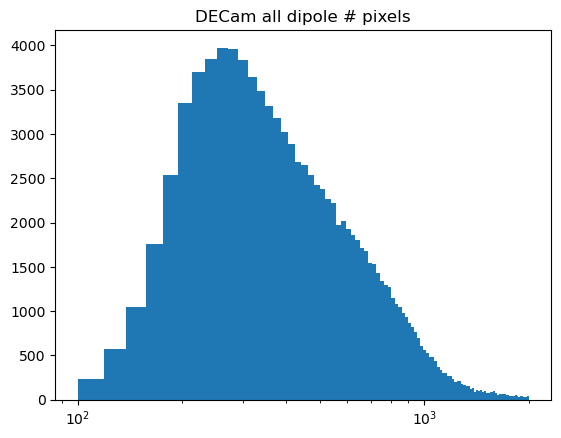

In [109]:
plt.xscale('log')
plt.title('DECam all dipole # pixels')
histplot = plt.hist(npixArr, bins=100, range=[100,2000])

## Find the npix cutoff
The above distribution has a clear log-linear trend with an intercept near 1000 pixels
Fit the distribution and find the intercept, assuming that the high npix tail are artifacts and not real dipoles

In [142]:
hist_all = np.histogram(npixArr, bins=100, range=[300,1000])

n_vals = hist_all[0]

npix_vals = np.log10(hist_all[1])

fit = np.polyfit(n_vals, npix_vals[1:], 1)

x_intercept = 10**fit[1]

x_intercept

1263.6850307120053

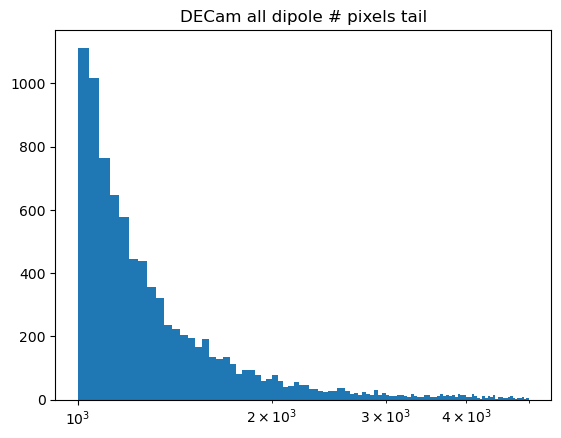

In [112]:
plt.xscale('log')
plt.title('DECam all dipole # pixels tail')
histplot = plt.hist(npixArr, bins=100, range=[1000,5000])

In [104]:
npixArr_good = np.ndarray(0, dtype=a0.dtype)

In [105]:
for v in visits:
    for c in ccds:
        npix = collect_dipole_pixels_good(v, c)
        npixArr_good = np.append(npixArr_good, npix)

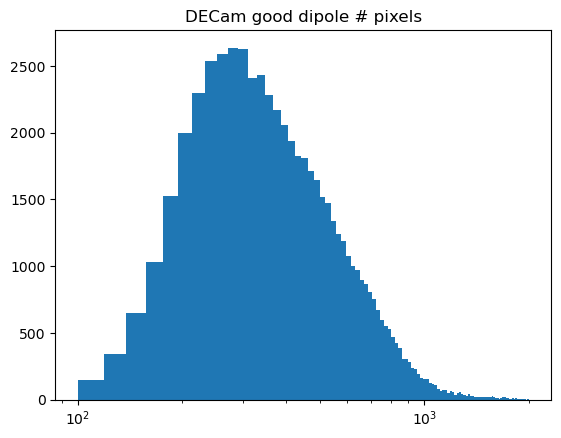

In [110]:
plt.xscale('log')
plt.title('DECam good dipole # pixels')
histplot = plt.hist(npixArr_good, bins=100, range=[100,2000])

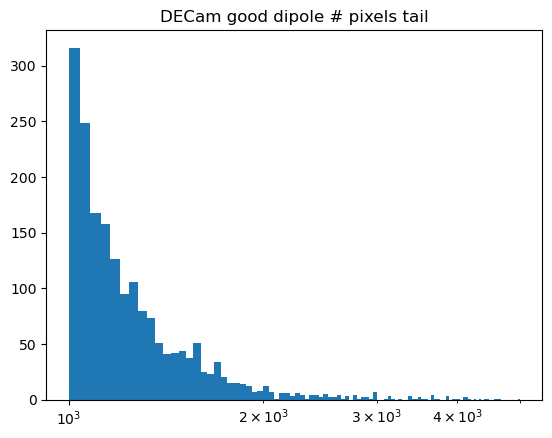

In [111]:
plt.xscale('log')
plt.title('DECam good dipole # pixels tail')
histplot = plt.hist(npixArr_good, bins=100, range=[1000,5000])

In [107]:
np.median(npixArr_good)

402.0

In [108]:
np.max(npixArr_good)

5809

In [121]:
len(visits)

84

In [123]:
len(ccds)

60

Find the intercept for the good dipoles

In [143]:
hist_good = np.histogram(npixArr_good, bins=100, range=[300,1000])

n_vals1 = hist_good[0]

npix_vals1 = np.log10(hist_good[1])

fit1 = np.polyfit(n_vals1, npix_vals1[1:], 1)

x_intercept1 = 10**fit1[1]

x_intercept1

1025.5098925886848